# Data Cleaning and Preprocessing

### Imports

In [202]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Deep Learning (Neural Networks and LSTM)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor

# Time Series Analysis (Optional)
import yfinance as yf
from datetime import datetime, timedelta



In [203]:
data = pd.read_csv('Google-Stock-Market-Data\data.csv')
data.head()



,Date,Open,High,Low,Close,Adj Close,Volume,Year,Volatility,Month,Volume_Category
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,2004,0.201743,8,Very High
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,2004,0.213699,8,Very High
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,2004,0.110336,8,Very High
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,2004,0.200000,8,Very High
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,2004,0.102616,8,Very High


In [204]:

print(data.head())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216   
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488   
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.724787  366857939   
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.611960  306396159   
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.640104  184645512   

   Year  Volatility  Month Volume_Category  
0  2004    0.201743      8       Very High  
1  2004    0.213699      8       Very High  
2  2004    0.110336      8       Very High  
3  2004    0.200000      8       Very High  
4  2004    0.102616      8       Very High  


In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4936 entries, 0 to 4935
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             4936 non-null   object 
 1   Open             4936 non-null   float64
 2   High             4936 non-null   float64
 3   Low              4936 non-null   float64
 4   Close            4936 non-null   float64
 5   Adj Close        4936 non-null   float64
 6   Volume           4936 non-null   int64  
 7   Year             4936 non-null   int64  
 8   Volatility       4936 non-null   float64
 9   Month            4936 non-null   int64  
 10  Volume_Category  4936 non-null   object 
dtypes: float64(6), int64(3), object(2)
memory usage: 424.3+ KB


In [206]:
print(data.isnull().sum())

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Year               0
Volatility         0
Month              0
Volume_Category    0
dtype: int64


In [207]:
print(data.describe())

              Open         High          Low        Close    Adj Close  \
count  4936.000000  4936.000000  4936.000000  4936.000000  4936.000000   
mean     43.077417    43.532659    42.644088    43.096952    43.096952   
std      40.320485    40.773849    39.917290    40.352092    40.352092   
min       2.470490     2.534002     2.390042     2.490913     2.490913   
25%      12.923497    13.048528    12.787071    12.922438    12.922438   
50%      26.795184    26.966079    26.570000    26.763133    26.763133   
75%      58.855251    59.352863    58.164000    58.788999    58.788999   
max     154.009995   155.199997   152.919998   154.839996   154.839996   

             Volume         Year   Volatility        Month  
count  4.936000e+03  4936.000000  4936.000000  4936.000000  
mean   1.174059e+08  2013.930308     0.888572     6.560981  
std    1.505185e+08     5.672880     1.057015     3.453135  
min    1.584340e+05  2004.000000     0.038605     1.000000  
25%    2.803600e+07  2009.00

In [208]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Year               0
Volatility         0
Month              0
Volume_Category    0
dtype: int64


In [209]:
data['Date'] = pd.to_datetime(data['Date'])

# Shotgun Method - Training and Evaluation of Baseline Models

In [210]:
# Example target column 'Close', will be used for prediction: ['Open', 'High', 'Low', 'Volume', 'Volatility']
features = ['Open', 'High', 'Low', 'Volume', 'Volatility']
target = 'Close'

In [211]:
# Separating data into independent and dependent variables
X = data[features]
y = data[target]


In [212]:
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [213]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

X_train shape: (3948, 5), X_test shape: (988, 5)


Model Performance:

Linear Regression:
MAE: 0.2079
MSE: 0.1404
RMSE: 0.3746
R2 Score: 0.9999

Random Forest:
MAE: 0.2694
MSE: 0.2495
RMSE: 0.4995
R2 Score: 0.9998

K-Nearest Neighbors:
MAE: 0.6484
MSE: 1.1006
RMSE: 1.0491
R2 Score: 0.9993


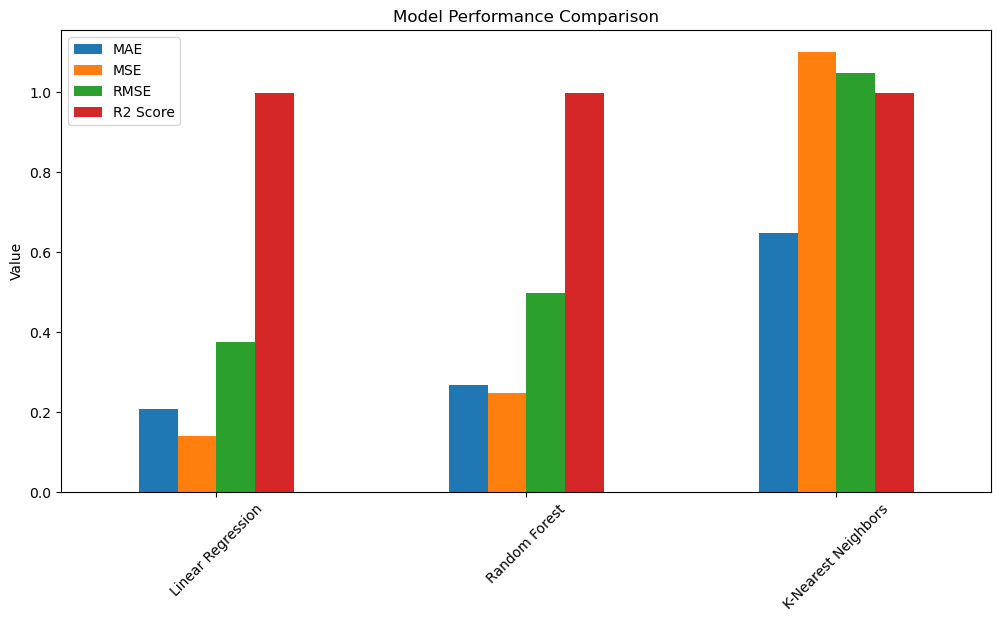

In [214]:
# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

# Train the models and store evaluation results
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

# Results
print("Model Performance:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# Visualize the performance comparison
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind='bar', figsize=(12, 6), title="Model Performance Comparison")
plt.xticks(rotation=45)
plt.ylabel("Value")
plt.show()


Explanations:

- Models: Linear Regression, Random Forest, and KNN were used.
- Performance Metrics: MAE, MSE, RMSE, and R2 Score were calculated.
- Visualization: We compared the performance of the models with a bar chart.

# Hyperparameter Optimization and Pipelining

In [215]:
# Best performing model: Random Forest (example)
# Hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Hyperparameter optimization with GridSearchCV
rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(
    estimator=rf_model, 
    param_grid=param_grid_rf, 
    cv=5, 
    scoring='r2', 
    verbose=2, 
    n_jobs=-1
)

# Optimize the model using the training data
grid_search_rf.fit(X_train, y_train)

# Display the best parameters and results
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Best R2 Score (CV): {grid_search_rf.best_score_:.4f}")

# Make predictions with the best model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Calculate performance metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print("\nRandom Forest Model Results (After Optimization):")
print(f"MAE: {mae_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R2 Score: {r2_rf:.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best R2 Score (CV): 0.9998

Random Forest Model Results (After Optimization):
MAE: 0.2709
MSE: 0.2514
RMSE: 0.5014
R2 Score: 0.9998


# Neural Network (Sniper Approach) - LSTM ile Modelleme

Epoch 1/50
122/122 [==============================] - 10s 59ms/step - loss: 0.0145
Epoch 2/50
122/122 [==============================] - 7s 58ms/step - loss: 0.0136
Epoch 3/50
122/122 [==============================] - 7s 57ms/step - loss: 52765052.0000
Epoch 4/50
122/122 [==============================] - 7s 57ms/step - loss: 0.0597
Epoch 5/50
122/122 [==============================] - 7s 54ms/step - loss: 0.0389
Epoch 6/50
122/122 [==============================] - 7s 54ms/step - loss: 0.0359
Epoch 7/50
122/122 [==============================] - 7s 55ms/step - loss: 0.0332
Epoch 8/50
122/122 [==============================] - 7s 55ms/step - loss: 0.0325
Epoch 9/50
122/122 [==============================] - 7s 56ms/step - loss: 0.0300
Epoch 10/50
122/122 [==============================] - 7s 54ms/step - loss: 0.0245
Epoch 11/50
122/122 [==============================] - 7s 54ms/step - loss: 0.0194
Epoch 12/50
122/122 [==============================] - 7s 55ms/step - loss: 0.0172
Epoch

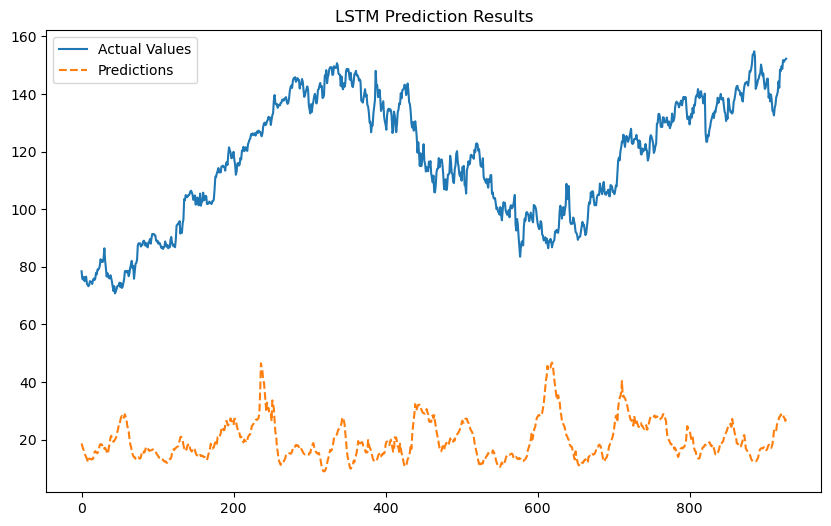

In [216]:
# Scaling the data for LSTM
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Reshaping the data for LSTM
time_steps = 60  # Use the past 60 days to make predictions
X_lstm, y_lstm = [], []

for i in range(time_steps, len(X_train)):
    X_lstm.append(X_train[i-time_steps:i])
    y_lstm.append(y_scaled[i])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=100, activation='relu', return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X_lstm, y_lstm, epochs=50, batch_size=32, verbose=1)

# Preparing the test set for predictions
X_test_lstm, y_test_lstm = [], []
for i in range(time_steps, len(X_test)):
    X_test_lstm.append(X_test[i-time_steps:i])
    y_test_lstm.append(y_scaled[i + len(X_train)])

X_test_lstm = np.array(X_test_lstm)
y_test_lstm = np.array(y_test_lstm)

# Making predictions
y_pred_lstm = model.predict(X_test_lstm)

# Reverting the scaling of predictions
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
y_test_lstm = scaler.inverse_transform(y_test_lstm)

# Calculating performance metrics
mae_lstm = mean_absolute_error(y_test_lstm, y_pred_lstm)
mse_lstm = mean_squared_error(y_test_lstm, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test_lstm, y_pred_lstm)

# Displaying results
print("\nLSTM Model Results:")
print(f"MAE: {mae_lstm:.4f}")
print(f"MSE: {mse_lstm:.4f}")
print(f"RMSE: {rmse_lstm:.4f}")
print(f"R2 Score: {r2_lstm:.4f}")

# Visualizing the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test_lstm, label="Actual Values")
plt.plot(y_pred_lstm, label="Predictions", linestyle='--')
plt.legend()
plt.title("LSTM Prediction Results")
plt.show()


In [217]:
# Rescaling the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshaping for time steps
time_steps = 60  # You can adjust this value based on your analysis
X_lstm, y_lstm = [], []

for i in range(time_steps, len(X_scaled)):
    X_lstm.append(X_scaled[i-time_steps:i])
    y_lstm.append(y_scaled[i])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)



In [218]:
# Building the LSTM model with tuned hyperparameters
model = Sequential()
model.add(LSTM(units=128, activation='relu', return_sequences=True, 
               input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(Dropout(0.3))  # Dropout rate to reduce overfitting
model.add(LSTM(units=64, activation='relu', return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=1))  # Output layer

# Optimizer with a lower learning rate
optimizer = Adam(learning_rate=0.001)  # You can adjust the learning rate if needed

# Compiling the model
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Training the model
history = model.fit(X_lstm, y_lstm, epochs=100, batch_size=32, verbose=1)



Epoch 1/100
153/153 [==============================] - 9s 43ms/step - loss: 0.0074
Epoch 2/100
153/153 [==============================] - 7s 43ms/step - loss: 0.0028
Epoch 3/100
153/153 [==============================] - 7s 44ms/step - loss: 0.0026
Epoch 4/100
153/153 [==============================] - 7s 43ms/step - loss: 0.0027
Epoch 5/100
153/153 [==============================] - 7s 43ms/step - loss: 0.0021
Epoch 6/100
153/153 [==============================] - 7s 44ms/step - loss: 0.0018
Epoch 7/100
153/153 [==============================] - 7s 43ms/step - loss: 0.0018
Epoch 8/100
153/153 [==============================] - 7s 43ms/step - loss: 0.0020
Epoch 9/100
153/153 [==============================] - 7s 44ms/step - loss: 0.0016
Epoch 10/100
153/153 [==============================] - 7s 43ms/step - loss: 0.0017
Epoch 11/100
153/153 [==============================] - 7s 43ms/step - loss: 0.0015
Epoch 12/100
153/153 [==============================] - 7s 44ms/step - loss: 0.0017
E

In [219]:
# Splitting the data for time series
train_size = int(len(X_scaled) * 0.8)  # Use 80% of the data for training
X_train_lstm, X_test_lstm = X_scaled[:train_size], X_scaled[train_size:]
y_train_lstm, y_test_lstm = y_scaled[:train_size], y_scaled[train_size:]



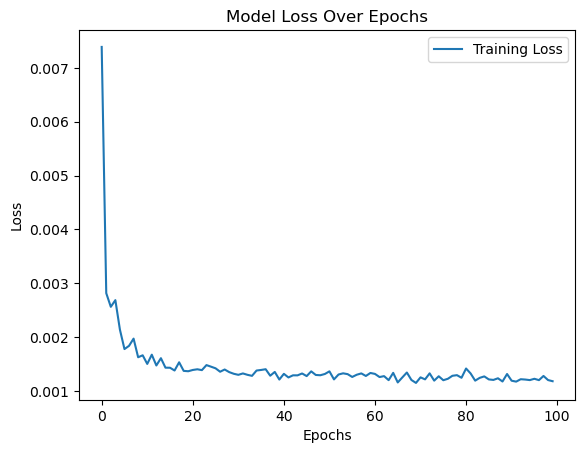

In [220]:
# Visualizing training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



In [221]:
# Define the date range
end_date = datetime.now() - timedelta(1)  # Yesterday's date
end_date_str = end_date.strftime('%Y-%m-%d')

start_date = end_date - timedelta(1825)  # 5 years ago
start_date_str = start_date.strftime('%Y-%m-%d')

# Download stock data
stock_data = yf.download('AAPL', start=start_date_str, end=end_date_str)  # Example: Apple stock

# Use only the closing price
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1, 1))




[*********************100%***********************]  1 of 1 completed


In [222]:
# Define time steps
time_steps = 7  # Using the past 7 days for prediction

X, y = [], []
for i in range(time_steps, len(scaled_data)):
    X.append(scaled_data[i-time_steps:i, 0])  # Create input sequences
    y.append(scaled_data[i, 0])  # Create corresponding target values

X, y = np.array(X), np.array(y)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)  # Use 80% of data for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [223]:
# Model definition
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # First LSTM layer
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(LSTM(units=64))  # Second LSTM layer
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(units=1))  # Output layer

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Learning rate can be adjusted
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Model summary
model.summary()

# Add early stopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=32, 
    validation_split=0.2,  # Use 20% of the training data for validation
    callbacks=[early_stopping], 
    verbose=1
)



Model: "sequential_498"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_993 (LSTM)             (None, 7, 64)             16896     
                                                                 
 dropout_993 (Dropout)       (None, 7, 64)             0         
                                                                 
 lstm_994 (LSTM)             (None, 64)                33024     
                                                                 
 dropout_994 (Dropout)       (None, 64)                0         
                                                                 
 dense_498 (Dense)           (None, 1)                 65        
                                                                 
Total params: 49985 (195.25 KB)
Trainable params: 49985 (195.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
25/

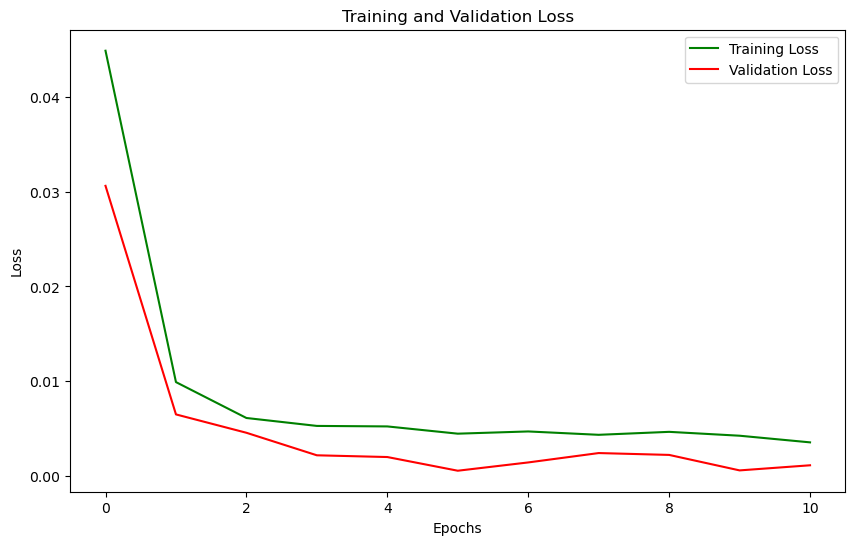

In [224]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='green')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [225]:
# Evaluate the model on test data
test_loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")



8/8 [==============================] - 0s 4ms/step - loss: 8.7115e-04
Test Loss: 0.0009


8/8 [==============================] - 1s 3ms/step


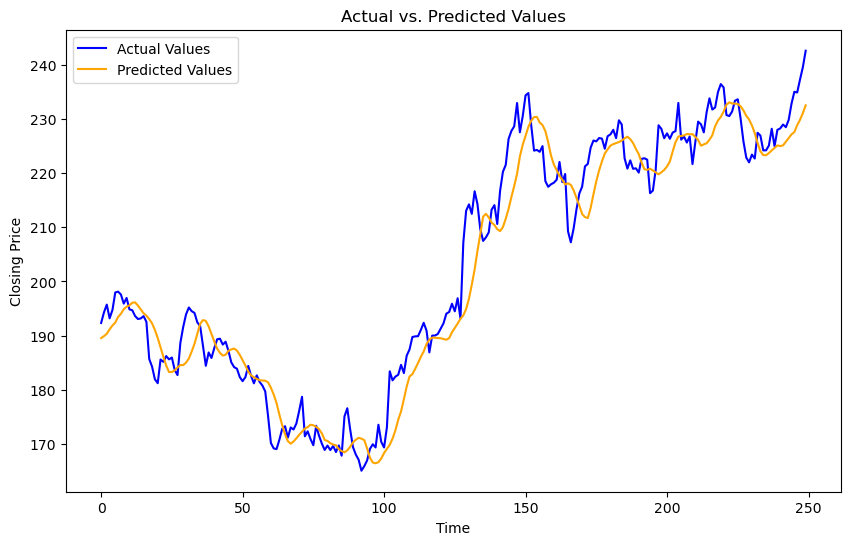

In [226]:
# Make predictions
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)  # Reverse scaling for predicted values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reverse scaling for actual values

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Values', color='blue')
plt.plot(predicted, label='Predicted Values', color='orange')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [227]:
mse = mean_squared_error(y_test_actual, predicted)
mae = mean_absolute_error(y_test_actual, predicted)
r2 = r2_score(y_test_actual, predicted)

print(f"MSE: {mse}, MAE: {mae}, R2 Score: {r2}")


MSE: 30.31931949435732, MAE: 4.345467895507812, R2 Score: 0.9399199437958254


## Grid Search ile Hiperparametre Optimizasyonu

In [228]:
# Function to build the model
def build_model(learning_rate=0.001, lstm_units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units=lstm_units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=lstm_units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Wrap the model with Scikeras
model = KerasRegressor(model=build_model, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'model__learning_rate': [0.001, 0.01],
    'model__lstm_units': [50, 100],
    'model__dropout_rate': [0.2, 0.3],
    'batch_size': [16, 32],
    'epochs': [10, 20]
}

# Apply Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and results
print(f"Best Parameters: {grid_result.best_params_}")
print(f"Best Score: {grid_result.best_score_}")


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters: {'batch_size': 16, 'epochs': 20, 'model__dropout_rate': 0.2, 'model__learning_rate': 0.01, 'model__lstm_units': 100}
Best Score: 0.9466683555640643


In [229]:
input_shape=(time_steps, feature_count)


In [230]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val_adjusted shape: {X_val_adjusted.shape}")
print(f"y_val_adjusted shape: {y_val_adjusted.shape}")


X_train shape: (999, 7, 1)
y_train shape: (999,)
X_val_adjusted shape: (962, 7, 1)
y_val_adjusted shape: (962, 1)


In [231]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, feature_count)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Tahmin edilen çıktı


In [232]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val_adjusted, y_val_adjusted),
    epochs=20,
    batch_size=16,
    verbose=1
)


Epoch 1/20
63/63 [==============================] - 4s 19ms/step - loss: 0.0365 - val_loss: 0.1891
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 0.0033 - val_loss: 0.2121
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 0.0025 - val_loss: 0.2177
Epoch 4/20
63/63 [==============================] - 0s 8ms/step - loss: 0.0026 - val_loss: 0.2139
Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 0.0023 - val_loss: 0.2142
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.0022 - val_loss: 0.2350
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 0.0028 - val_loss: 0.2005
Epoch 8/20
63/63 [==============================] - 0s 7ms/step - loss: 0.0021 - val_loss: 0.2101
Epoch 9/20
63/63 [==============================] - 1s 10ms/step - loss: 0.0022 - val_loss: 0.2114
Epoch 10/20
63/63 [==============================] - 0s 7ms/step - loss: 0.0020 - val_loss: 0.2188
Epoch 11/20
63/63

In [233]:


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val_adjusted, y_val_adjusted),
    epochs=50,
    batch_size=16,
    callbacks=[early_stopping]
)


Epoch 1/50
63/63 [==============================] - 1s 11ms/step - loss: 0.0017 - val_loss: 0.2356
Epoch 2/50
63/63 [==============================] - 1s 9ms/step - loss: 0.0017 - val_loss: 0.2122
Epoch 3/50
63/63 [==============================] - 0s 8ms/step - loss: 0.0017 - val_loss: 0.2309
Epoch 4/50
63/63 [==============================] - 1s 8ms/step - loss: 0.0015 - val_loss: 0.2155
Epoch 5/50
63/63 [==============================] - 0s 7ms/step - loss: 0.0016 - val_loss: 0.2310
Epoch 6/50
63/63 [==============================] - 1s 9ms/step - loss: 0.0015 - val_loss: 0.2103
Epoch 7/50
63/63 [==============================] - 0s 8ms/step - loss: 0.0015 - val_loss: 0.2251
Epoch 8/50
63/63 [==============================] - 0s 8ms/step - loss: 0.0013 - val_loss: 0.2223
Epoch 9/50
63/63 [==============================] - 0s 8ms/step - loss: 0.0015 - val_loss: 0.2183
Epoch 10/50
63/63 [==============================] - 0s 7ms/step - loss: 0.0013 - val_loss: 0.2174
Epoch 11/50
63/63 

In [234]:
# Redefine the model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(time_steps, feature_count)))
model.add(Dropout(0.3))  # Increased dropout rate to reduce overfitting
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu'))  # Added an additional Dense layer
model.add(Dense(units=1))  # Output layer

# Compile the model
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)  # Learning rate can be tuned further
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Display the model architecture
model.summary()



Model: "sequential_501"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_999 (LSTM)             (None, 7, 100)            40800     
                                                                 
 dropout_999 (Dropout)       (None, 7, 100)            0         
                                                                 
 lstm_1000 (LSTM)            (None, 50)                30200     
                                                                 
 dropout_1000 (Dropout)      (None, 50)                0         
                                                                 
 dense_501 (Dense)           (None, 32)                1632      
                                                                 
 dense_502 (Dense)           (None, 1)                 33        
                                                                 
Total params: 72665 (283.85 KB)
Trainable params: 72

In [235]:
# Extract the best parameters
best_params = grid_result.best_params_

# Create a new model with the best parameters
final_model = build_model(
    learning_rate=best_params['model__learning_rate'],
    lstm_units=best_params['model__lstm_units'],
    dropout_rate=best_params['model__dropout_rate']
)

# Train the model
history = final_model.fit(
    X_train, 
    y_train,
    validation_data=(X_val_adjusted, y_val_adjusted),  # Validation dataset
    epochs=50,  # Adjust epochs if needed
    batch_size=64,  # Larger batch size
    callbacks=[early_stopping],  # Early stopping to prevent overfitting
    verbose=1  # Display training progress
)



Epoch 1/50
16/16 [==============================] - 4s 66ms/step - loss: 0.0369 - val_loss: 0.1190
Epoch 2/50
16/16 [==============================] - 0s 17ms/step - loss: 0.0059 - val_loss: 0.2578
Epoch 3/50
16/16 [==============================] - 0s 17ms/step - loss: 0.0030 - val_loss: 0.1873
Epoch 4/50
16/16 [==============================] - 0s 17ms/step - loss: 0.0019 - val_loss: 0.2087
Epoch 5/50
16/16 [==============================] - 0s 17ms/step - loss: 0.0016 - val_loss: 0.2119
Epoch 6/50
16/16 [==============================] - 0s 18ms/step - loss: 0.0014 - val_loss: 0.2058


In [236]:
# Define the time steps and feature count
time_steps = 7  # Time steps used during training
feature_count = 1  # Number of features

# Adjust X_test to the appropriate shape
X_test_adjusted = []
y_test_adjusted = []

for i in range(time_steps, len(X_test)):
    X_test_adjusted.append(X_test[i-time_steps:i, 0])  # Extract the feature column
    y_test_adjusted.append(y_test[i])  # Append the target value

# Convert to NumPy arrays and reshape
import numpy as np
X_test_adjusted = np.array(X_test_adjusted).reshape(-1, time_steps, feature_count)
y_test_adjusted = np.array(y_test_adjusted).reshape(-1, 1)

# Print the shapes of the adjusted arrays
print(f"X_test_adjusted shape: {X_test_adjusted.shape}")
print(f"y_test_adjusted shape: {y_test_adjusted.shape}")



X_test_adjusted shape: (243, 7, 1)
y_test_adjusted shape: (243, 1)


In [237]:
test_loss = final_model.evaluate(X_test_adjusted, y_test_adjusted, verbose=1)
print(f"Test Loss: {test_loss}")


8/8 [==============================] - 0s 3ms/step - loss: 0.0076
Test Loss: 0.007603486068546772


8/8 [==============================] - 1s 4ms/step


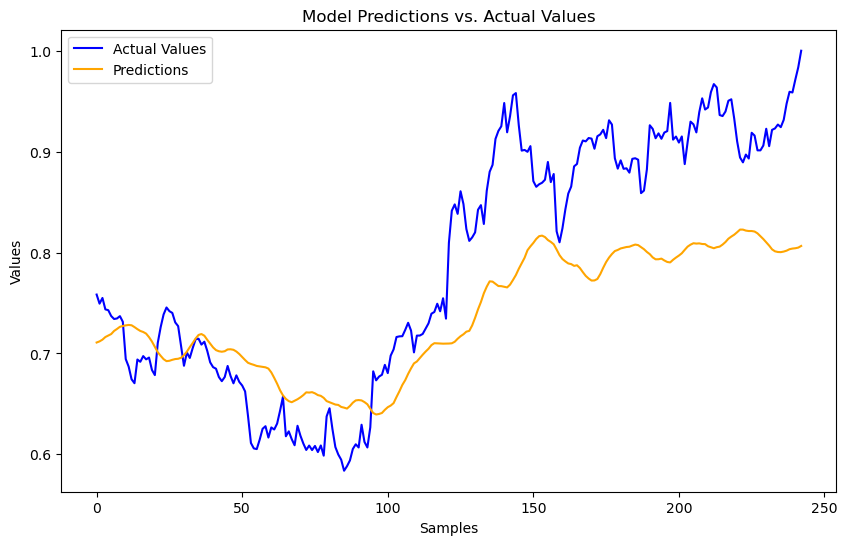

In [238]:
# Make predictions using the final model
y_pred = final_model.predict(X_test_adjusted)

# Visualize predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_adjusted, label='Actual Values', color='blue')
plt.plot(y_pred, label='Predictions', color='orange')
plt.title('Model Predictions vs. Actual Values')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.show()


In [239]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test_adjusted, y_pred)
mae = mean_absolute_error(y_test_adjusted, y_pred)
r2 = r2_score(y_test_adjusted, y_pred)

# Print the results
print(f"MSE: {mse:.4f}")  # Mean Squared Error
print(f"MAE: {mae:.4f}")  # Mean Absolute Error
print(f"R2 Score: {r2:.4f}")  # R2 Score


MSE: 0.0076
MAE: 0.0733
R2 Score: 0.4883


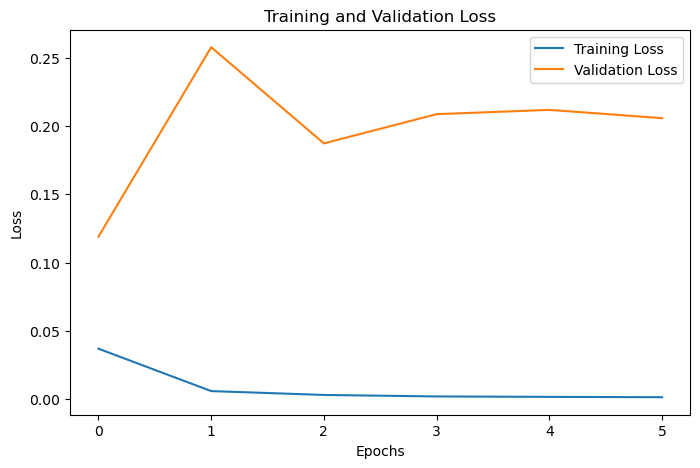

In [240]:
# Visualize training and validation losses
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
